# Data analysis: Survivors of sinking of the Titanic

Data analysis of survivors of sinking of the Titanic, using data from:

<https://hbiostat.org/data/>

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
pd.options.display.precision = 2

## Read data

In [4]:
df = pd.read_csv("titanic.txt")
df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.00,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.92,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## Analysis

### Divide age into buckets

In [5]:
(df["age"].min(), df["age"].max())

(0.1667, 71.0)

In [6]:
bins = np.arange(0.0, 90.0, 10.0)
bins

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [7]:
df["age_bucket"] = pd.cut(df["age"], bins=bins)
df.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,age_bucket
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,"(20.0, 30.0]"
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,"(0.0, 10.0]"
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,"(20.0, 30.0]"


### Number of passengers and survivors

In [8]:
def survivors(df):
    return len(df[df == 1])

def survivors_pct(df):
    if len(df) > 0:
        return len(df[df == 1]) / len(df)
    else:
        return 0.0

In [9]:
len(df["survived"])

1313

In [10]:
survivors(df["survived"])

449

In [11]:
survivors_pct(df["survived"])

0.341964965727342

### Survivors by age

In [12]:
survivors_by_age = df.groupby("age_bucket")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_age

,survivors,total,survivors_pct
age_bucket,,,
"(0.0, 10.0]",33,47,0.70
"(10.0, 20.0]",46,98,0.47
"(20.0, 30.0]",70,197,0.36
"(30.0, 40.0]",62,130,0.48
"(40.0, 50.0]",42,93,0.45
"(50.0, 60.0]",24,47,0.51
"(60.0, 70.0]",4,18,0.22
"(70.0, 80.0]",0,3,0.00


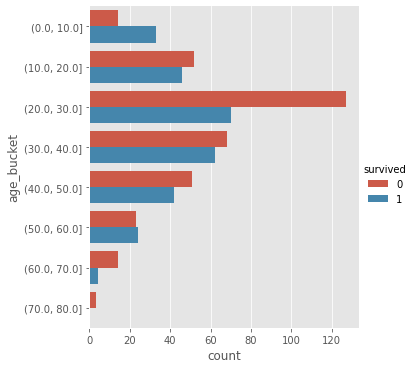

In [13]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

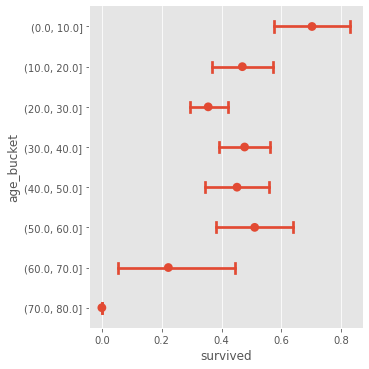

In [14]:
sns.catplot(data=df, y="age_bucket", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class

In [15]:
survivors_by_class = df.groupby("pclass")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class

,survivors,total,survivors_pct
pclass,,,
1st,193,322,0.60
2nd,119,280,0.42
3rd,137,711,0.19


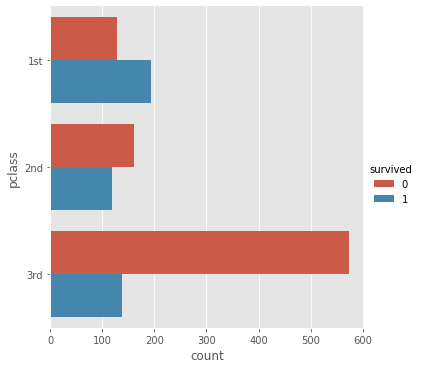

In [16]:
sns.catplot(data=df, y="pclass", hue="survived", kind="count")

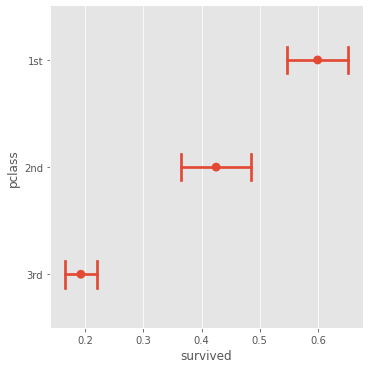

In [17]:
sns.catplot(data=df, y="pclass", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class and age

In [18]:
survivors_by_class_and_age = df.groupby(["pclass", "age_bucket"])["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class_and_age.unstack(level=0)

survivors             total             survivors_pct            
pclass             1st   2nd   3rd   1st   2nd   3rd           1st   2nd   3rd
age_bucket                                                                    
(0.0, 10.0]        3.0  20.0  10.0   4.0  20.0  23.0          0.75  1.00  0.43
(10.0, 20.0]      17.0  15.0  14.0  19.0  29.0  50.0          0.89  0.52  0.28
(20.0, 30.0]      30.0  28.0  12.0  45.0  84.0  68.0          0.67  0.33  0.18
(30.0, 40.0]      33.0  21.0   8.0  49.0  43.0  38.0          0.67  0.49  0.21
(40.0, 50.0]      29.0  11.0   2.0  54.0  25.0  14.0          0.54  0.44  0.14
(50.0, 60.0]      23.0   1.0   0.0  37.0   9.0   1.0          0.62  0.11  0.00
(60.0, 70.0]       4.0   0.0   0.0  16.0   1.0   1.0          0.25  0.00  0.00
(70.0, 80.0]       0.0   0.0   NaN   2.0   1.0   NaN          0.00  0.00   NaN

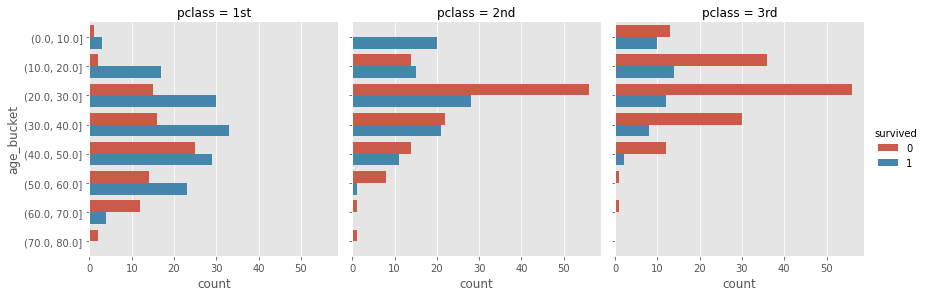

In [19]:
sns.catplot(data=df, y="age_bucket", hue="survived", col="pclass", kind="count", height=4)

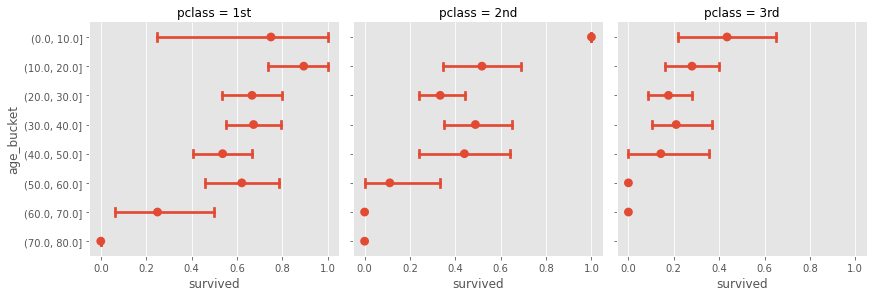

In [20]:
sns.catplot(data=df, y="age_bucket", x="survived", col="pclass", kind="point", join=False, orient="h", capsize=0.25, height=4)